In [1]:
#Importing all the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#paths for the HUPA-UC Diabetes Dataset and various CSV outputs.
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"


In [ ]:
# Q1: How does average glucose vary across age groups?
# Column(s): glucose, age
# Reason: Blood sugar control often changes with age; older patients may have different glucose patterns.
# Analysis goal: Identify which age groups may need targeted interventions.

  age_group     glucose
0     11-20  143.677664
1     21-30  156.729813
2     31-40  161.867670
3     41-50  138.105406
4     51-60  132.712928
5     61-70  147.541359
6     71-80  133.053330


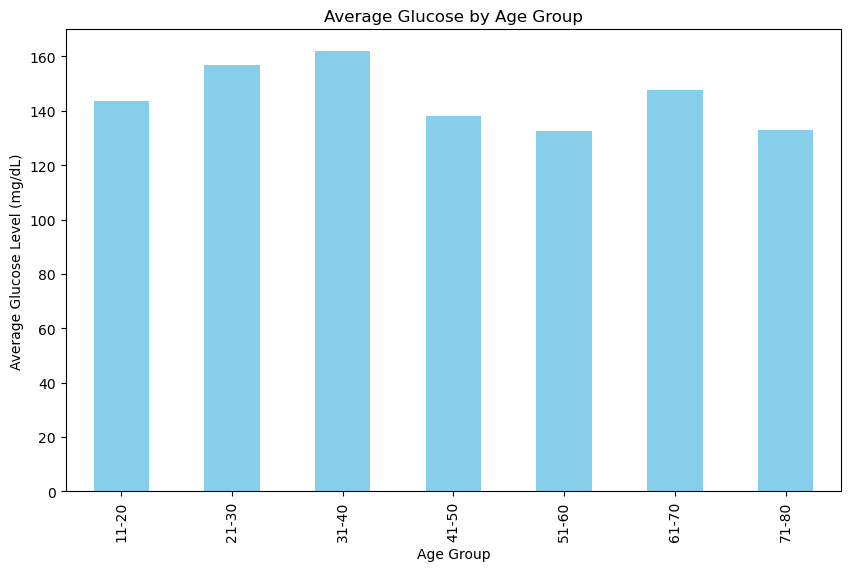

In [8]:


# Read CSV
df = pd.read_csv(patients_demographic_path)

#Create age groups 
age_bins = [10,20,30,40,50,60,70,80]
age_labels = ['11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

#Calculate average glucose by age group
avg_glucose_by_age = df.groupby('age_group', observed=False)['glucose'].mean().reset_index()
print(avg_glucose_by_age)

#Plot the results(bar chart)
avg_glucose_by_age.plot(kind='bar', x='age_group', y='glucose', color='skyblue', legend=False, figsize=(10,6))
plt.title("Average Glucose by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()


In [ ]:
#Q2 Impact of Carbohydrate Intake on Glucose Spikes
#Columns: glucose, carb_input
#Reason: Higher carb intake usually increases blood sugar levels.
#Goal: See how glucose changes with carb intake.

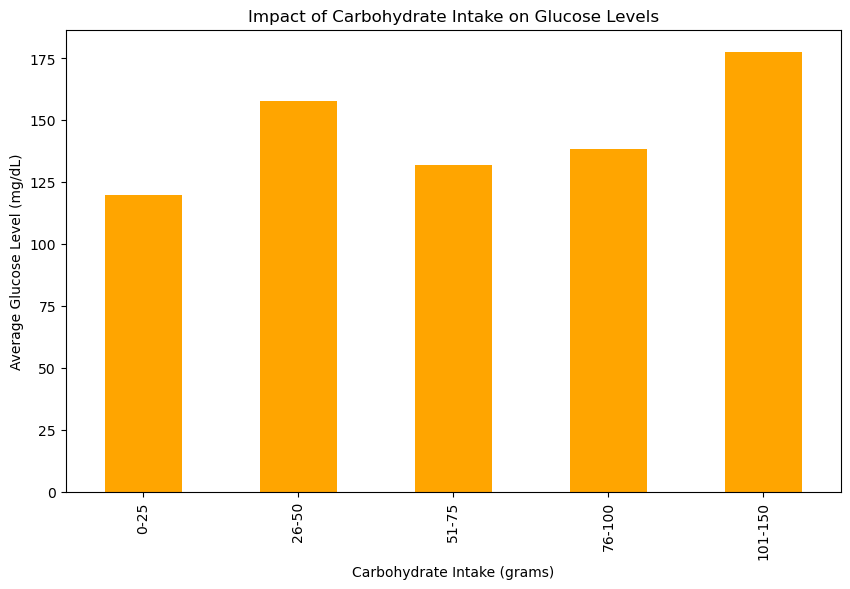

In [42]:

# Read CSV
df = pd.read_csv(patients_demographic_path, sep=",") 

# Create carb intake bins
carb_bins = [0, 25, 50, 75, 100, 150]  
carb_labels = ['0-25', '26-50', '51-75', '76-100', '101-150', '151-200']

#  Create carb intake bins
carb_bins = [0, 25, 50, 75, 100, 150]  
carb_labels = ['0-25', '26-50', '51-75', '76-100', '101-150']

df['carb_group'] = pd.cut(df['carb_input'], bins=carb_bins, labels=carb_labels)

# Calculate average glucose by carb group
avg_glucose_by_carb = df.groupby('carb_group', observed=False)['glucose'].mean().reset_index()

# Plot
avg_glucose_by_carb.plot(
    kind='bar',
    x='carb_group',
    y='glucose',
    color='orange',
    legend=False,
    figsize=(10,6)
)

plt.title("Impact of Carbohydrate Intake on Glucose Levels")
plt.xlabel("Carbohydrate Intake (grams)")
plt.ylabel("Average Glucose Level (mg/dL)")
plt.show()

In [ ]:
#Q4 Glucose Variation by Sleep Quality
#Columns: glucose, sleep_quality_score
#Reason: Poor sleep quality is linked to higher blood sugar. Monitoring this can help understand if patients’ glucose spikes are related to sleep issues.
#Goal: Compare glucose levels for different sleep quality levels using averages and an easy-to-understand plot..

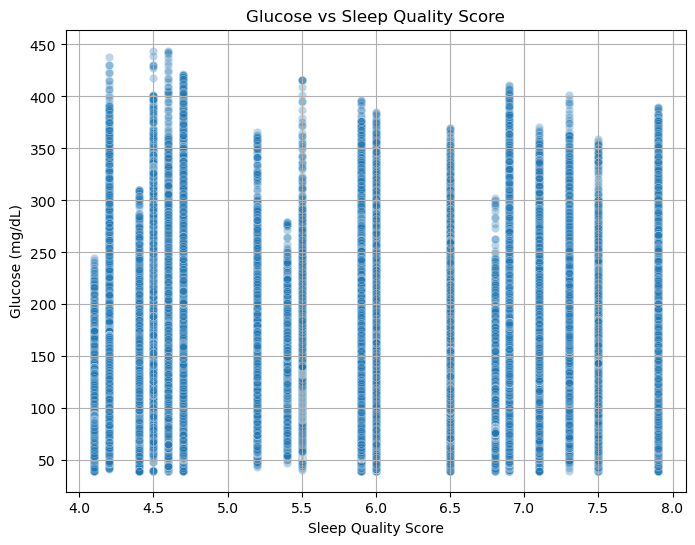

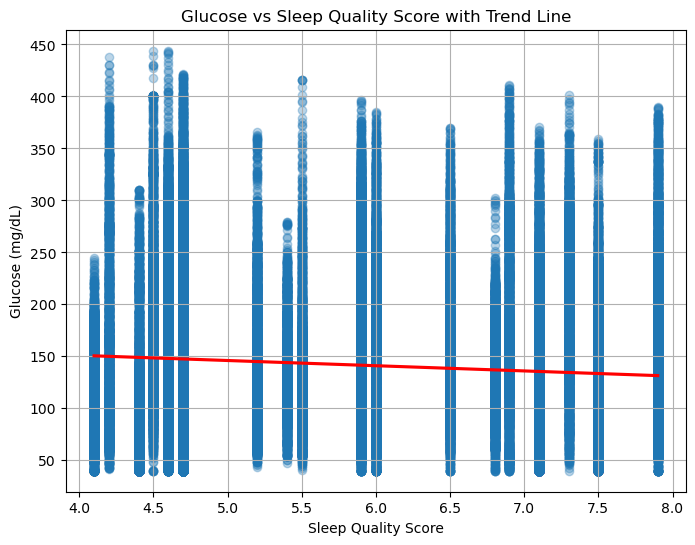

In [39]:

# Read CSV
df = pd.read_csv(patients_demographic_path, sep=",")

# Scatter plot: glucose vs sleep quality
plt.figure(figsize=(8,6))
sns.scatterplot(x='sleep_quality_score', y='glucose', data=df, alpha=0.3)
plt.title('Glucose vs Sleep Quality Score')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.show()

# Regression line to show trend
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_quality_score', y='glucose', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Glucose vs Sleep Quality Score with Trend Line')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.show()